In [86]:
# autoreload
%load_ext autoreload
%autoreload 2

# fix path
import sys
sys.path.append("/home/jxm/reverse-training")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [109]:
from utils.analysis import load_results_as_df
import os


HOME_DIR = "/home/jxm/reverse-training"
df = load_results_as_df(os.path.join(HOME_DIR, "results"))
df = df[df["select_seed_dataset"].str.contains("2000000")]
len(df)


Filtered 0/300 results with no evaluation metrics
dict_keys(['data', 'full_ot_distance', 'sinkhorn_distance', 'jaccard_overlap_examples', 'jaccard_overlap_vocabulary', 'levenshtein_stats', 'args', 'expert_evaluation_metrics', 'evaluation_metrics'])


26

In [110]:
print(df["dataset"].value_counts(), "\n")
print(df["select_full_dataset_size"].value_counts(), "\n")
print(df["select_batch_fill_strategy"].value_counts(), "\n")

dataset
ag_news_10000    26
Name: count, dtype: int64 

select_full_dataset_size
500      7
1000     7
5000     7
10000    4
100      1
Name: count, dtype: int64 

select_batch_fill_strategy
random    26
Name: count, dtype: int64 



In [95]:
[col for col in df.columns if ("eval" in col or "dataset" in col)]

['dataset',
 'dataset_size',
 'eval_every',
 'select_seed_dataset',
 'select_full_dataset_size',
 'num_eval_epochs',
 'best_eval_loss',
 'best_eval_accuracy',
 'dataset_sinkhorn_distance',
 'dataset_full_ot_distance',
 'dataset_jaccard_overlap_examples',
 'dataset_jaccard_overlap_vocabulary']

In [96]:
import pandas as pd

pd.set_option('display.max_rows', None)

dv_cols = ["select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"]

iv_cols = ["best_eval_accuracy", "dataset_sinkhorn_distance", "dataset_jaccard_overlap_vocabulary"]

df.groupby(dv_cols)[iv_cols].mean().sort_values(by=["select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], ascending=False)

best_eval_accuracy  \
select_seed_dataset select_full_dataset_size select_batch_fill_strategy                       
nq_2000000          10000                    random                                0.847656   
                    5000                     random                                0.845947   
                    1000                     random                                0.805908   
                    500                      random                                0.781006   
                    100                      random                                0.456055   
msmarco_2000000     10000                    random                                0.849935   
                    5000                     random                                0.848958   
                    1000                     random                                0.783203   
                    500                      random                                0.740885   

                                                                         dataset_sinkhorn_distance  \
select_seed_dataset select_full_dataset_size select_batch_fill_strategy                              
nq_2000000          10000                    random                                       1.289012   
                    5000                     random                                       1.290554   
                    1000                     random                                       1.291944   
                    500                      random                                       1.292007   
                    100                      random                                       1.298857   
msmarco_2000000     10000                    random                                       1.320799   
                    5000                     random                                       1.320982   
                    1000                     random                                       1.321848   
                    500                      random                                       1.320896   

                                                                         dataset_jaccard_overlap_vocabulary  
select_seed_dataset select_full_dataset_size select_batch_fill_strategy                                      
nq_2000000          10000                    random                                                0.699821  
                    5000                     random                                                0.637599  
                    1000                     random                                                0.362626  
                    500                      random                                                0.243840  
                    100                      random                                                0.078014  
msmarco_2000000     10000                    random                                                0.702342  
                    5000                     random                                                0.624817  
                    1000                     random                                                0.342004  
                    500                      random                                                0.230719

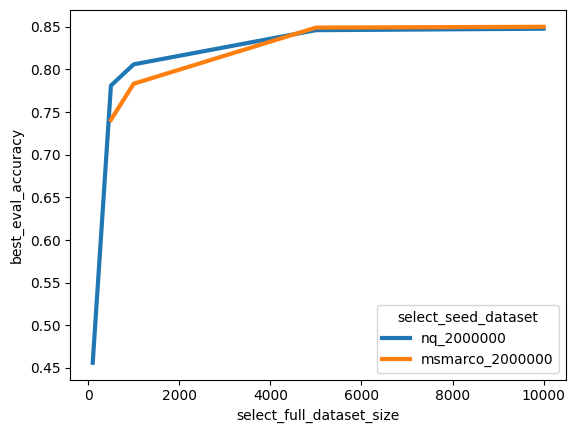

In [105]:
import seaborn as sns

pdf = df.groupby(dv_cols)[iv_cols].mean().sort_values(by=["select_seed_dataset", "select_full_dataset_size", "select_batch_fill_strategy"], ascending=False)
pdf = pdf.reset_index()
rdf = pdf[pdf["select_batch_fill_strategy"] == "random"]

ax = sns.lineplot(data=rdf, x="select_full_dataset_size", y="best_eval_accuracy", hue="select_seed_dataset", lw=3)
# sns.lineplot(data=rdf, x="select_full_dataset_size", y="dataset_sinkhorn_distance", hue="select_seed_dataset")
# ax.set_xscale("log")